<a href="https://colab.research.google.com/github/Nachopedrero/Apuntes-de-Clase/blob/main/Copia_de_Data_Table_Display.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

primero importamos las librerias necesarias y creamos el dataset usando el csv



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [ ]:
df_aire = pd.read_csv("air_traffic_data.csv")

In [ ]:
df_aire

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


La primera tarea que llevaremos a cabo, consistirá en conocer con qué tipo de datos
contamos. Para ello, tendremos que categorizarlos según su estructura y presentarlos en la
siguiente plantilla:


In [ ]:
df_aire.dtypes


Activity Period                 int64
Operating Airline              object
Operating Airline IATA Code    object
Published Airline              object
Published Airline IATA Code    object
GEO Summary                    object
GEO Region                     object
Activity Type Code             object
Price Category Code            object
Terminal                       object
Boarding Area                  object
Passenger Count                 int64
Adjusted Activity Type Code    object
Adjusted Passenger Count        int64
Year                            int64
Month                          object
dtype: object

vemos cuantas compañias diferentes hay

In [ ]:
compañias = df_aire["Operating Airline"].value_counts()
compañias

United Airlines - Pre 07/01/2013    2154
SkyWest Airlines                     963
United Airlines                      892
Alaska Airlines                      751
Delta Air Lines                      386
                                    ... 
Evergreen International Airlines       2
Atlas Air, Inc                         2
Xtra Airways                           2
Pacific Aviation                       2
Boeing Company                         1
Name: Operating Airline, Length: 77, dtype: int64

¿Cuántos pasajeros tienen de media los vuelos de cada compañía?


In [ ]:
df_aire.groupby('Operating Airline')['Passenger Count'].mean()

Operating Airline
ATA Airlines          8744.636364
Aer Lingus            4407.183673
Aeromexico            5463.822222
Air Berlin            2320.750000
Air Canada           18251.560109
                         ...     
Virgin Atlantic       9847.104651
WestJet Airlines      5338.155340
World Airways          261.666667
XL Airways France     2223.161290
Xtra Airways            73.000000
Name: Passenger Count, Length: 77, dtype: float64

Eliminamos los registros duplicados por el campo “GEO Región”, manteniendo
únicamente aquel con mayor número de pasajeros.



In [ ]:
#ordenamos los valores de pasajeros en orden ascendente
df_aire.sort_values(by=['Passenger Count'], ascending=True)
#quitamos los duplicados de geo region
df_aire.drop_duplicates(subset=['GEO Region'], keep='last')


,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
12098,201403,LAN Peru,LP,LAN Peru,LP,International,South America,Enplaned,Other,International,A,2886,Enplaned,2886,2014,March
14931,201603,Etihad Airways,EY,Etihad Airways,EY,International,Middle East,Enplaned,Other,International,A,5007,Enplaned,5007,2016,March
14973,201603,TACA,TA,TACA,TA,International,Central America,Enplaned,Other,International,A,5405,Enplaned,5405,2016,March
14986,201603,United Airlines,UA,United Airlines,UA,International,Asia,Enplaned,Other,International,G,71388,Enplaned,71388,2016,March
14988,201603,United Airlines,UA,United Airlines,UA,International,Australia / Oceania,Enplaned,Other,International,G,6372,Enplaned,6372,2016,March
14994,201603,United Airlines,UA,United Airlines,UA,International,Canada,Enplaned,Other,Terminal 3,F,9378,Enplaned,9378,2016,March
15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15006,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Enplaned,Other,International,A,10898,Enplaned,10898,2016,March


In [ ]:
df_aire


,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
12098,201403,LAN Peru,LP,LAN Peru,LP,International,South America,Enplaned,Other,International,A,2886,Enplaned,2886,2014,March
14931,201603,Etihad Airways,EY,Etihad Airways,EY,International,Middle East,Enplaned,Other,International,A,5007,Enplaned,5007,2016,March
14973,201603,TACA,TA,TACA,TA,International,Central America,Enplaned,Other,International,A,5405,Enplaned,5405,2016,March
14986,201603,United Airlines,UA,United Airlines,UA,International,Asia,Enplaned,Other,International,G,71388,Enplaned,71388,2016,March
14988,201603,United Airlines,UA,United Airlines,UA,International,Australia / Oceania,Enplaned,Other,International,G,6372,Enplaned,6372,2016,March
14994,201603,United Airlines,UA,United Airlines,UA,International,Canada,Enplaned,Other,Terminal 3,F,9378,Enplaned,9378,2016,March
15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15006,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Enplaned,Other,International,A,10898,Enplaned,10898,2016,March




creamos el nuevo csv



In [ ]:
df_aire.to_csv('air_traffic_data2.csv', index=False)


In [ ]:
df_aire2 = pd.read_csv("air_traffic_data2.csv")
df_aire2

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,201403,LAN Peru,LP,LAN Peru,LP,International,South America,Enplaned,Other,International,A,2886,Enplaned,2886,2014,March
1,201603,Etihad Airways,EY,Etihad Airways,EY,International,Middle East,Enplaned,Other,International,A,5007,Enplaned,5007,2016,March
2,201603,TACA,TA,TACA,TA,International,Central America,Enplaned,Other,International,A,5405,Enplaned,5405,2016,March
3,201603,United Airlines,UA,United Airlines,UA,International,Asia,Enplaned,Other,International,G,71388,Enplaned,71388,2016,March
4,201603,United Airlines,UA,United Airlines,UA,International,Australia / Oceania,Enplaned,Other,International,G,6372,Enplaned,6372,2016,March
5,201603,United Airlines,UA,United Airlines,UA,International,Canada,Enplaned,Other,Terminal 3,F,9378,Enplaned,9378,2016,March
6,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
7,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
8,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Enplaned,Other,International,A,10898,Enplaned,10898,2016,March


A continuacion analizaremos todos los datos y obtendremos conclusionees


comenzaremos con la media del recuento de pasajeros y la desviacion estandar


In [ ]:
print("LA MEDIA DE PASAJEROS DE TODOS LOS DATOS ES :" ,df_aire2['Passenger Count'].mean())


LA MEDIA DE PASAJEROS DE TODOS LOS DATOOS ES : 34518.11111111111


In [ ]:
print("LA DESVIACION ESTANDAR DE PASAJEROS DE TODOS LOS DATOS ES",df_aire2['Passenger Count'].std())

LA DESVIACION ESTANDAR DE PASAJEROS DE TODOS LOS DATOS ES 63823.85141826769


<ipython-input-60-25c7f62d6f9c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_aire2.corr(), annot=True, cmap='coolwarm')


<Axes: >

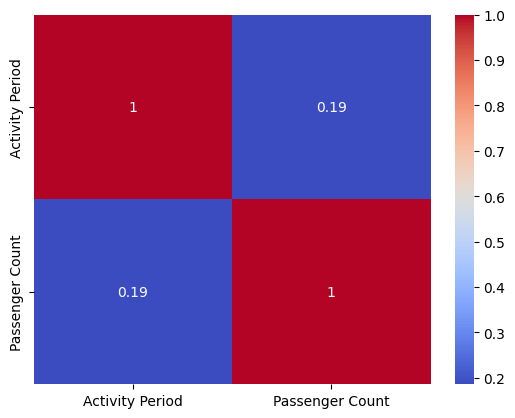

In [ ]:

sns.heatmap(df_aire2.corr(), annot=True, cmap='coolwarm')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
